In [217]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [218]:
df = pd.read_csv("Documents/SlingMediaChallenge/WDI_csv/WDIData.csv")
dfner= df.loc[df['Indicator Code'].isin(['SP.POP.DPND','SP.POP.DPND.OL','SP.POP.DPND.YG'])]
dfner = dfner[dfner['Country Code'].isin(['NER'])]
dfner.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
303937,Niger,NER,Age dependency ratio (% of working-age populat...,SP.POP.DPND,97.727810,98.643628,99.471324,100.158333,100.548065,100.562548,...,109.825817,110.229127,110.910947,111.338298,111.573962,111.665115,111.615631,111.778739,111.647781,NaN
303938,Niger,NER,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,2.235373,2.371556,2.496452,2.609956,2.711004,2.799775,...,5.166369,5.191626,5.246548,5.292613,5.330681,5.359870,5.379984,5.399137,5.403775,NaN
303939,Niger,NER,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,95.492437,96.272072,96.974872,97.548378,97.837061,97.762773,...,104.659448,105.037501,105.664399,106.045685,106.243281,106.305245,106.235647,106.379602,106.244006,NaN


In [219]:
dfpop = df.loc[df['Indicator Code'].isin(['SP.POP.DPND','SP.POP.DPND.OL','SP.POP.DPND.YG'])]


In [220]:
len(dfpop['Country Code'].unique())
dfpop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
56,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,88.205810,89.644734,90.944498,92.063631,92.892881,93.364459,...,63.365027,62.694715,62.341696,62.168854,62.118188,62.089858,62.017234,62.057475,61.916180,NaN
57,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,6.602746,6.714313,6.809043,6.884778,6.937449,6.965510,...,6.691941,6.680537,6.701228,6.731905,6.776477,6.840704,6.928260,7.050994,7.190462,NaN
58,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,81.465388,82.775832,83.945660,84.928415,85.637945,86.037480,...,54.755813,54.074423,53.702683,53.519299,53.457553,53.403490,53.281380,53.243579,53.006604,NaN
1647,Caribbean small states,CSS,Age dependency ratio (% of working-age populat...,SP.POP.DPND,90.426835,92.044514,93.471578,94.654536,95.593472,96.340008,...,52.629353,51.668780,50.848709,50.026796,49.252632,48.608672,48.143790,47.854973,47.783816,NaN
1648,Caribbean small states,CSS,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,7.863890,8.066763,8.280795,8.492469,8.697817,8.903197,...,11.418727,11.547283,11.680850,11.839413,12.020912,12.225391,12.457792,12.729961,13.023415,NaN


In [221]:
dfpop = dfpop[['Country Code','Indicator Code','2016']]

In [222]:
dfpop.tail()

,Country Code,Indicator Code,2016
416899,ZMB,SP.POP.DPND.OL,4.753810
416900,ZMB,SP.POP.DPND.YG,86.025853
418489,ZWE,SP.POP.DPND,79.195304
418490,ZWE,SP.POP.DPND.OL,5.045339
418491,ZWE,SP.POP.DPND.YG,74.149965


In [223]:
dfpop_Wrk = dfpop.loc[dfpop['Indicator Code'].isin(['SP.POP.DPND'])]
dfpop_Wrk_old = dfpop.loc[dfpop['Indicator Code'].isin(['SP.POP.DPND.OL'])]
dfpop_Wrk_yng = dfpop.loc[dfpop['Indicator Code'].isin(['SP.POP.DPND.YG'])]

In [224]:
#Exploring population
dfpop_Wrk.describe()

,2016
count,239.000000
mean,58.781579
std,16.813850
min,17.608178
25%,47.855183
50%,53.801531
75%,67.713289
max,111.778739


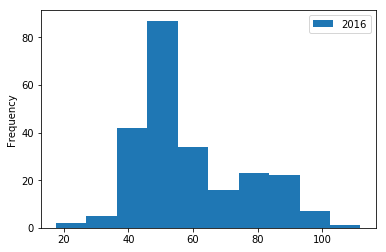

In [225]:
dfpop_Wrk.plot.hist()

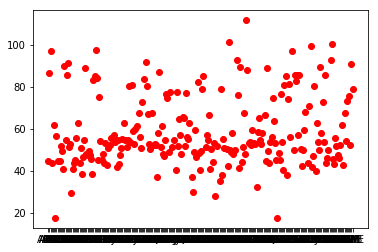

In [213]:
plt.plot(dfpop_Wrk['Country Code'],dfpop_Wrk['2016'],'ro')
plt.show()

In [214]:
#Finding Outlers in SP.POP.DPND
outliers = []
for i in dfpop_Wrk.values:
    if i[2]>95 or i[2]<10:
        outliers.append(i[0])
print(outliers)
        

['AGO', 'TCD', 'COD', 'MLI', 'NER', 'SOM', 'UGA']


In [228]:

dfPopOut= df.loc[df['Indicator Code'].isin(['SP.POP.DPND','SP.POP.DPND.OL','SP.POP.DPND.YG'])]
dfPopOut = dfPopOut[dfPopOut['Country Code'].isin(['AGO', 'TCD', 'COD', 'MLI', 'NER', 'SOM', 'UGA'])]
dfPopOut = dfPopOut[['Country Code','Indicator Code','2016']]
print(dfPopOut)

       Country Code  Indicator Code        2016
82788           AGO     SP.POP.DPND   97.274212
82789           AGO  SP.POP.DPND.OL    4.634846
82790           AGO  SP.POP.DPND.YG   92.639366
135291          TCD     SP.POP.DPND   99.426016
135292          TCD  SP.POP.DPND.OL    4.930255
135293          TCD  SP.POP.DPND.YG   94.495762
144837          COD     SP.POP.DPND   97.496491
144838          COD  SP.POP.DPND.OL    5.965313
144839          COD  SP.POP.DPND.YG   91.531178
270526          MLI     SP.POP.DPND  101.460053
270527          MLI  SP.POP.DPND.OL    5.087520
270528          MLI  SP.POP.DPND.YG   96.372533
303937          NER     SP.POP.DPND  111.778739
303938          NER  SP.POP.DPND.OL    5.399137
303939          NER  SP.POP.DPND.YG  106.379602
354849          SOM     SP.POP.DPND   97.049243
354850          SOM  SP.POP.DPND.OL    5.343589
354851          SOM  SP.POP.DPND.YG   91.705653
396215          UGA     SP.POP.DPND  100.630768
396216          UGA  SP.POP.DPND.OL    4

In [229]:
#Work young data analysics
dfpop_Wrk_yng.describe()


,2016
count,239.000000
mean,45.625819
std,21.641018
min,15.354240
25%,27.415526
50%,40.784284
75%,61.269158
max,106.379602


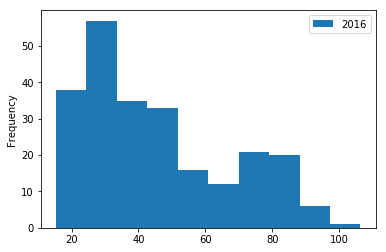

In [230]:
dfpop_Wrk_yng.plot.hist()

In [233]:
#Finding Outlers in SP.POP.DPND
outliers = []
for i in dfpop_Wrk_yng.values:
    if i[2]>90:
        outliers.append(i[0])
print(outliers)

['AGO', 'TCD', 'COD', 'MLI', 'NER', 'SOM', 'UGA']


In [234]:
dfpop_Wrk_old.describe()

,2016
count,239.000000
mean,13.011244
std,8.659866
min,1.275081
25%,6.197587
50%,9.795671
75%,18.614341
max,43.908595


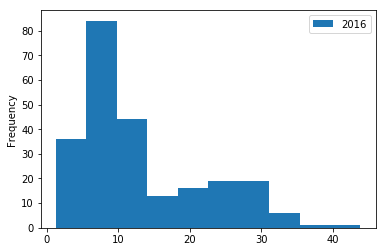

In [236]:
dfpop_Wrk_old.plot.hist()

In [243]:
#Finding Outlers in SP.POP.DPND
outliers = []
for i in dfpop_Wrk_old.values:
    if i[2]<3 or i[2] > 50:
        outliers.append(i[0])
print(outliers)

['KWT', 'QAT', 'ARE']


In [244]:
#No outliers in the old population categories

Conclusion :

In the overall population we could see below countries are having population working greater than 90 and less than 10.
* AGO
* TCD
* COD
* MLI
* NER
* SOM
* UGA

In the young population we could see below countries are having population working greater than 90.

* AGO
* TCD
* COD
* MLI
* NER
* SOM
* UGA

In the old population we couldn’t  see below countries are having population with greater or smaller range


We can conclude that for year 2016 below countries are the outliers.
* AGO
* TCD
* COD
* MLI
* NER
* SOM
* UGA
Future work.
We can further analyze the data and find what is the rational behind these observation and conclude if this is a valid outlier 